    Customer churn is a major problem and one of the most important concerns for large companies. Due to the direct 
    effect on the revenues of the companies, especially in the telecom field, companies are seeking to develop 
    means to predict potential customer to churn. Therefore, finding factors that increase customer churn is 
    important to take necessary actions to reduce this churn. The main contribution of your work is to develop a 
    churn prediction model which assists telecom operators to predict customers who are most likely subject to 
    churn. Perform the following operations as you create the much needed machine learning application.

 
    - Using the given dataset extract the relevant features that can define a customer churn. [5]
    - Using relevant mapping features show areas where customers churn a lot. [10]
    - Using the features in (i) define and train an Extreme Gradient Boosting “XGBOOST” model. [10]
    - Evaluate the model’s accuracy and calculate the AUC value. [5]
    - Create a platform to host the model either web-based or desktop application. [20]
    - Allow users to use the application to enter new data and your model should predict if the supplied data 
    of a new customer can result in a churn or not giving the confidence factor of the model. [10]
 

    NB: Present this application to the Facilitator before you make a submission on canvas

    # Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing (i.e. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

%matplotlib inline

    # Data

In [2]:
# Import customer data; format xlsx
customer_data = pd.read_excel("datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.xlsx")

    # Basic Data Analysis

In [3]:
# View first 5 entries of the customer data
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Size or Dimension of data
customer_data.shape

(7043, 21)

In [5]:
# Columns
col = customer_data.columns
col

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# View information; number of entries, columns, null values (if any), and variable type
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [7]:
# Fill-in missing values in "TotalCharges" column; observe missing values in df.info()
totalCharges_mean = customer_data['TotalCharges'].mean()
customer_data['TotalCharges'].fillna(totalCharges_mean, inplace=True)

In [9]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

    Since we will be building an ML Model, let's convert non-numerical variables into numerical ones.
    We will import the LabelEncoder module from sklearn.preprocessing to aid us in this.

In [8]:
# Import LabelEncoder to convert non-numerical variables to numerical variables
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder method
le = LabelEncoder()

In [9]:
# Assigning customer_data to data variable; preserving original dataset
data = customer_data.copy()

In [10]:
# List of label names to Encode
encode_label = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', \
          'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', \
          'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


for label in encode_label:
    le.fit(data[label]) # Fit data to LabelEncode
    output = le.transform(data[label]) # Transform the fitted data
    data[label] = pd.Series(data=output) # Re-assign the transfored data to the DataFrame

In [11]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


    Initial Observation:
    1. "customerID" won't help us in classification

In [12]:
# Drop "customerID" variable
data.drop(labels=['customerID'], axis=1, inplace=True)

In [13]:
# Basic Stats
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


    # 1. Feature Selection

    Let's start by trying to find out how many features gives us the optimal performance for our model.

    Recursive Feature Elimination with cross-validation and XGBOOST

In [64]:
import xgboost as xgb
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

# Filtering the Label
y = data.iloc[:, -1]

# Filtering Features
X = data.iloc[:, :-1]

# Splitting the data into a test_size to train_size ratio of 2:8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The "accuracy" scoring is proportional to the number of correct classifications
xgb_cl_1 = xgb.XGBClassifier(objective="binary:logistic") 

# 5-Fold Cross-validation
rfecv = RFECV(estimator=xgb_cl_1, step=1, cv=5, scoring='accuracy')

rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 16
Best features : Index(['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


Text(0, 0.5, 'Cross-validation score of number of selected features')

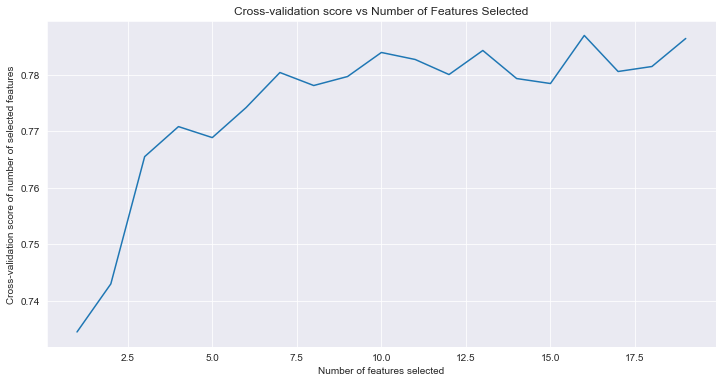

In [47]:
# Plot number of features VS. cross-validation scores

sns.set_style("darkgrid")

plt.figure(figsize=(12,6))
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

plt.title("Cross-validation score vs Number of Features Selected")
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score of number of selected features")

In [65]:
# Filtering for selected features and re-assigning back to "X_train" 
X_train = X_train[X_train.columns[rfecv.support_]]
X_test = X_test[X_test.columns[rfecv.support_]]

    # 3. Training the Model

    * Hyper-parameter Tuning with GridSearch on XGBOOST

In [91]:
from sklearn.model_selection import GridSearchCV

# Converting data to DMatrix format
churn_dmatrix = xgb.DMatrix((X[X.columns[rfecv.support_]]), y)

# Create the parameter grid: gbm_param_grid
xg_param_grid = {
    'eta': [0.01, 0.1, 0.5, 1],
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
#     'gamma': [0.1, 0.5, 0.7]
}

# Instantiate the classifier: cg_cl_2
xg_cl_2 = xgb.XGBClassifier(objective="binary:logistic")

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=xg_cl_2, param_grid=xg_param_grid,
                        scoring='neg_mean_squared_error', cv=4, verbose=1)
grid_mse.fit((X[X.columns[rfecv.support_]]), y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters found:  {'colsample_bytree': 0.3, 'eta': 0.1, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  0.4415261439534536


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    9.7s finished


    Note:
    
    - The parameters values found above will be used in training out XGBOOST Model.

In [94]:
# Instantiate the classifier: gbm
gbm = xgb.XGBClassifier(
    objective="binary:logistic",
    learning_rate=0.1, 
    max_depth=5, 
    n_estimators=50, 
    colsample_bytree=0.3
)

# Fit the data with selected features from above
gbm.fit(X_train, y_train)

# Predict on test data
preds = gbm.predict(X_test)

# Compute Accuracy
accuracy = (np.sum(preds == y_test)) / y_test.shape[0]
print("Accuracy {}".format(accuracy))

Accuracy 0.808374733853797


    * AUC SCORE

In [105]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_test, preds)
print("AUC Score: {}".format(auc_score))

AUC Score: 0.713561129110727


    # Data Visualization

    To start off by understanding which features define a customer churn, we will go onto to visualize the
    relationship between the features and churn. 
    
    Here, I will focus on using the following features which will help use with this understanding;
    - violinplot
    - swarmplot
    - heatmap

In [17]:
data.shape

(7043, 19)

    We will split the data into three sets, and visualize it in these sets.

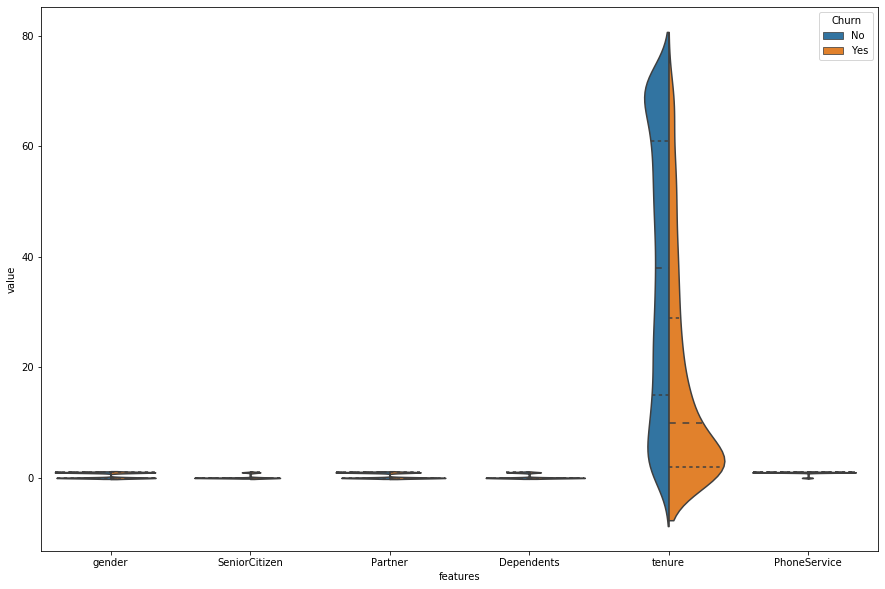

In [18]:
# data_1 = pd.concat([y, data.iloc[:, :6]], axis=1) # Concatenate the Label (Churn) and first 6 Features
# data_1 = pd.melt(data_1, id_vars='Churn', var_name='features', value_name='value')

# plt.figure(figsize=(15, 10))
# ax = sns.violinplot(data=data_1, x='features', y='value', hue='Churn', split=True, inner='quart')

    Graph Interpretation:
    
    - The features "gender", "SeniorCitizen", "Partner", Dependents" and "PhoneService" have a median of "No"
      and "Yes" that do not look seperated. These features do not look good for classification. 
      
    - "Tenure" has a median "No" and "Yes" that looks seperated. This might be a good feature for classification.
    
    Note:
    1. All features exhibiting a median that is not seperated between "No" and "Yes" are categorical variables.
    2. "Tenure" is not categorical, but continuous.
    3. "gender" and "Parter" seem to be correlated.

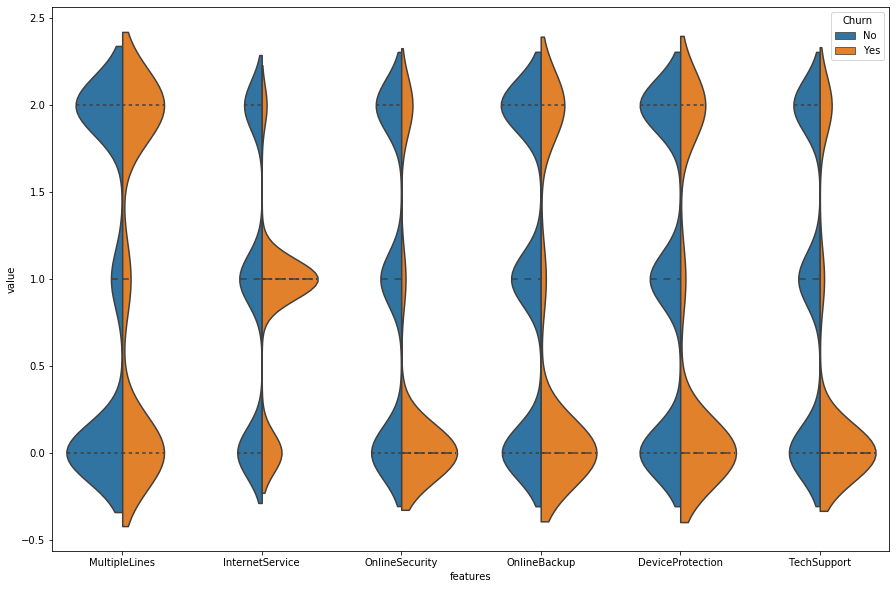

In [19]:
# data_2 = pd.concat([y, data.iloc[:, 6:12]], axis=1) # Concatenate the Label (Churn) and first 6 Features
# data_2 = pd.melt(data_2, id_vars='Churn', var_name='features', value_name='value')

# plt.figure(figsize=(15, 10))
# ax = sns.violinplot(data=data_2, x='features', y='value', hue='Churn', split=True, inner='quart')

    Graph Interpretation:
    
    - All features in the graph have a median that is not seperated around "No" and "Yes". This doesn't look
      good for classification.
    
    Note:
    1. Similar to the first graph, we observe that these features are categorical.
    2. "OnlineBackup" and "DeviceProtection" seem to be correlated.
    3. "OnlineSecurity" and "TechSupport" seem to be correlated.

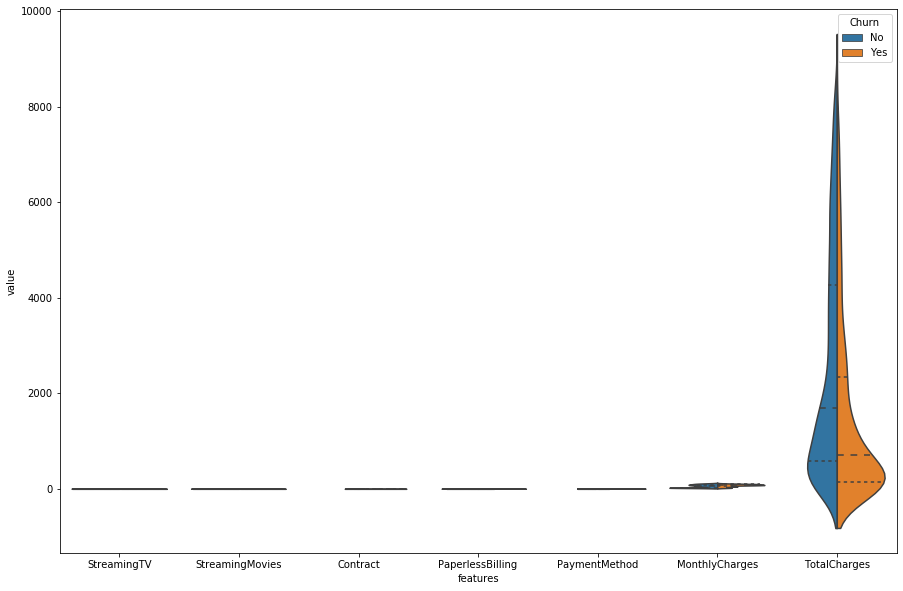

In [20]:
# data_3 = pd.concat([y, data.iloc[:, 12:20]], axis=1) # Concatenate the Label (Churn) and first 6 Features
# data_3 = pd.melt(data_3, id_vars='Churn', var_name='features', value_name='value')

# plt.figure(figsize=(15, 10))
# ax = sns.violinplot(data=data_3, x='features', y='value', hue='Churn', split=True, inner='quart')

    Graph Interpretation:
    
    - The features "StreamingTV", "StreamingMovies", "Contract", "PaperlessBiling", and "PaymentMethod" have 
      a median that is not seperated around "No" and "Yes" which don't look good for classification.
    
    - "MonthlyCharges" and "TotalCharges" have a median that is seperated. This looks good for classification.
    
    Note:
    1. Similar to the first and second violinplots, we remind ourselves that the variables that don't look good
       for classification, in this dataset, are all categorical.
    2. "StreamingTV" and "StreamingMovies" also seem to be correlated.

    Let's explore how correlated these variables are to each other using the correlation plot

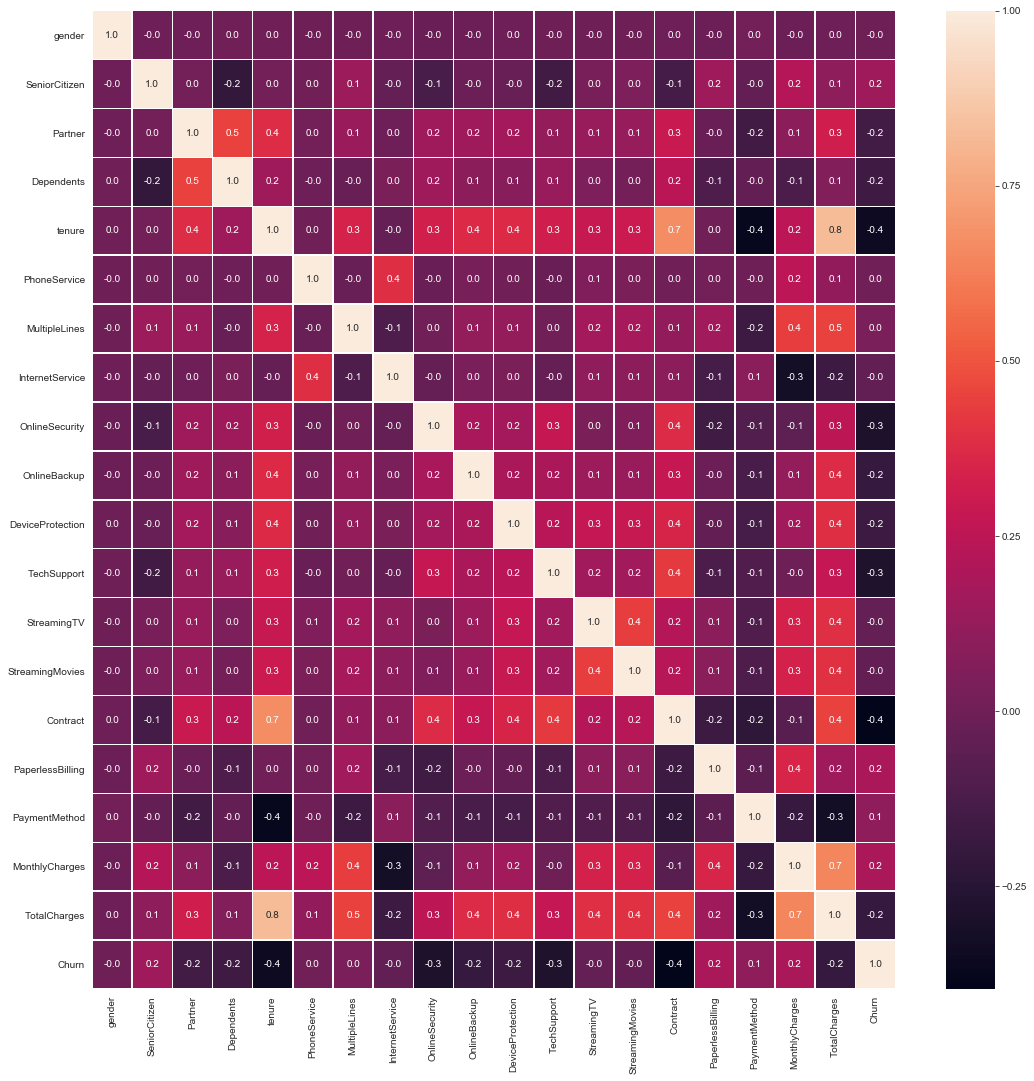

In [106]:
# Correlation Map
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)